<a href="https://colab.research.google.com/github/jiyounglee523/projectmanager/blob/main/2_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_01_%EA%B8%B0%EC%88%A0%ED%86%B5%EA%B3%84%EA%B8%B0%EC%B4%88_%EC%99%84%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석

## 1. 기술통계기초

----------------------------------

### 라이브러리 설치하기

In [ ]:
# SciPy는 과학, 수학, 엔지니어링 등에 사용되는 고급 계산 기능을 제공 라이브러리
!pip install scipy

In [ ]:
# 수치 데이터 분석 라이브러리
!pip install numpy

In [ ]:
# 데이터를 표 형태로 보여주는 데이터 분석 라이브러리
!pip install pandas

In [ ]:
# 데이터를 다양한 그래프로 보여주는 시각화 라이브러리
!pip install matplotlib

In [ ]:
# 통계 그래프 시각화 라이브러리
!pip install seaborn

In [ ]:
# 통계 모델 라이브러리
!pip install statsmodels

In [ ]:
# 머신러닝 라이브러리(사이킷런)
!pip install sklearn

In [ ]:
# 엑셀 시트 사용을 위한 라이브러리
!pip install openpyxl

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 코랩에서 위 코드를 실행시킨 후  반드시 코랩(Colab)의 런타임을 재시작 합니다.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,315 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120831 files and dire

----------

### 라이브러리 설치 확인하기
아래 코드를 실행한 후 오류 메시지가 없으면 성공적으로 설치된 것입니다.

In [ ]:
import scipy as sp
sp.__version__

In [ ]:
import numpy as np
np.__version__

In [ ]:
import pandas  as pd
pd.__version__

In [ ]:
import matplotlib as plt
plt.__version__

In [ ]:
import seaborn as sns
sns.__version__

---------------------------------------------

### [실습] Scipy 라이브러리로 이항분포 구현하기

In [1]:
#scipy패키지의 special모듈에 있는 comb함수 사용
import numpy as np
from scipy.special import comb

def Bin(n, p):
    x_set = np.arange(n+1)

    def f(x):
        if x in x_set:
            return comb(n,x) * p**x * (1-p)**(n-x)
        else:
            return 0

    return x_set, f

n, p = 10, 5/4
X = Bin(n, p)
X

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <function __main__.Bin.<locals>.f(x)>)

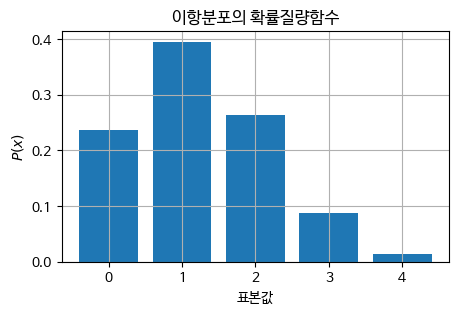

In [4]:
import scipy as sp
import scipy.stats
#[코랩용 한글]
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')        # 방법1
plt.rcParams['font.family'] = 'NanumBarunGothic' # 방법2

plt.rcParams['figure.figsize'] = (5,3)
#plt.rcParams['font.family'] = 'Malgun Gothic'  # '맑은 고딕'으로 설정
plt.rcParams['axes.unicode_minus'] = False     # 그래프에서 (-)숫자표시

n = 5
mu = 0.25
rv = sp.stats.binom(n, mu)

xx = np.arange(n)
plt.bar(xx, rv.pmf(xx), align='center')
plt.xlabel('표본값')
plt.ylabel('$P(x)$')
plt.title('이항분포의 확률질량함수')
plt.grid()
plt.show()

### [실습] Scipy 라이브러리로 다항분포 구현하기

[[19  9 19 20 16 17]
 [14 14 21 14 14 23]
 [18 23  7 17 20 15]
 [18 18 14 21 16 13]
 [17 13 16 20 17 17]
 [16 18 17 18 16 15]]


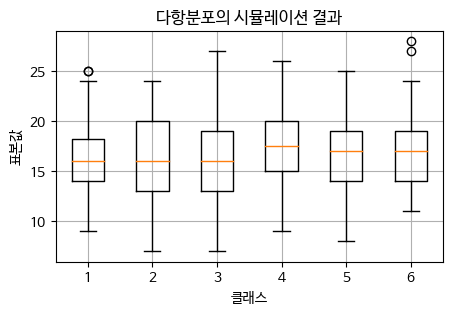

In [5]:
# 주사위를 N번 던져 각 면이 나오는 횟수 집합의 분포
N = 100
mu = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
rv = sp.stats.multinomial(N, mu) # 다항분포

np.random.seed(10)
X = rv.rvs(100)
print(X[:6])  # 6개만 보여주기

plt.boxplot(X)
plt.xlabel('클래스')
plt.ylabel('표본값')
plt.title('다항분포의 시뮬레이션 결과')
plt.grid()
plt.show()

### [실습] 이항분포 N(표본)을 늘리면 정규분포화 된다.

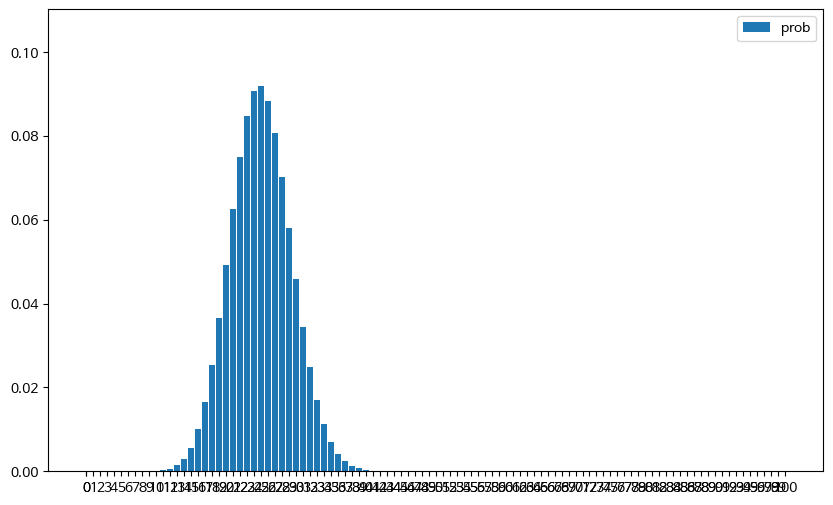

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate

# 기대값:평균
def E(X, g=lambda x:x):
    x_range, f = X

    def integrand(x):
        return g(x) * f(x)

    return integrate.quad(integrand, -np.inf, np.inf)[0]

# 확률
def get_prob(X, a, b):
    x_range, f = X

    prob_sum = np.round(integrate.quad(f, a, b), 4)

    print(f'확률: {prob_sum[0]}')


def plot_prob_bi(X):
    x_set, f = X
    prob = np.array([ f(x_k) for x_k in x_set])

    fig = plt.figure(figsize=(10,6))
    ax  = fig.add_subplot(111) # (1,1,1)

    ax.bar(x_set, prob, label='prob')
    ax.set_xticks(np.append(x_set, E(X)))   #x축의 값 출력
    ax.set_ylim(0, prob.max()*1.2)          #y축의 한계 지정
    ax.legend()

    plt.show()

n = 100    # n의 개수를 크게 해보기 --> 그래프가 종모양으로 변경됨
p = 0.25   # 0.3, 0.5, 0.7 변경해보기
X = Bin(n,p)   # 이항분포에서  n의 개수를 늘리면?
plot_prob_bi(X)

### [실습] Scipy 라이브러리로 정규분포 구현하기

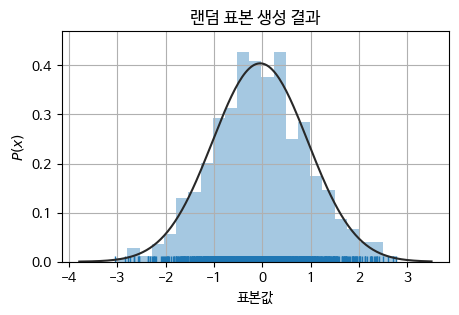

In [7]:
import scipy as sp
import seaborn as sns

# 워닝 메시지 안나오게 하는 방법
import warnings
warnings.filterwarnings('ignore')

np.random.seed(0)   # 랜덤 초기
mu, std = 0, 1      # 평균, 표준편차
rv = sp.stats.norm(mu, std)     #  정규분포
X = rv.rvs(1000)                #  표본 반영
# print(x)

sns.distplot(X, rug=True, kde=False, fit=sp.stats.norm)
plt.title('랜덤 표본 생성 결과')
plt.xlabel('표본값')
plt.ylabel('$P(x)$')
plt.grid()
plt.show()

### [실습] 정규분포를 이용한 확률 구하기
남자 고등학생 키의 평균이 170cm이고 표준편차가 5cm라면, 우연히 만난 남자 고등학생의 키는 N(170, 5^2)를 따른 다고 할 수 있다. 이 사실을 바탕으로 우연히 만난 남자 고등학생의 키가 165cm이상 175cm 이하일 확률은?

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate

# 확률
def get_prob(X, a, b):
    x_range, f = X

    prob_sum = np.round(integrate.quad(f, a, b), 4)

    print(f'확률: {prob_sum[0]}')

#𝑍 ~ N(0,1) 정규화를 따른 정규분포
def N(mu, sigma):
    x_range = [-np.inf, np.inf]
    def f(x):
        return 1 / np.sqrt(2 * np.pi * sigma**2) *\
                    np.exp(-(x-mu)**2 / (2 * sigma**2))
    return x_range, f

mu, sigma = 170, 5
X = N(mu, sigma)

a, b = 165, 175
get_prob(X, a, b)

확률: 0.6827


-----------------

## 2.Numpy를 이용한 기술통계

numpy는 아래와 같은 데이터 집합에 대해 간단한 통계를 계산하는 함수(통계량)를 제공한다.

- 데이터의 개수(count)
 - 최댓값(maximum) : 데이터 중에서 가장 큰 값
 - 최솟값(minimum) : 데이터 중에서 가장 작은 값


### 대표값
데이터 분포의 중심 위치
 - 평균(mean, average): 평균을 통계용어->표본 평균(sample average, sample mean)
 - 중앙값(median) : 데이터를 크기대로 정렬하였을 때 가장 가운데에 있는 수
 - 최빈값(mode):

### 산포도
중심으로부터 데이터가 흩어져 있는 정도(변이도)를 수치적으로 측정
 - 분산(variance): 표본 분산, 데이터와 표본 평균간의 거리의 제곱의 평균, 표본 분산이 작으면 데이터가 모여있는 것이고 크면 흩어져 있는 것
 - 표준편차(standard deviation) : 표본 분산의 양의 제곱근 값
 - 사분위수(quartile) : 데이터를 가장 작은 수부터 가장 큰 수까지 크기가 커지는 순서대로 정렬하였을 때 1/4, 2/4, 3/4 위치에 있는 수
 - 변동계수(coefficient of variation): 두 집단 비교
 - 왜도(skewness) : 분포의 대칭이나 비대칭의 정도를 표시하는 척도
 - 첨도(kurtosis) : 뽀족함의 정도를 나타내는 척도

In [10]:
import numpy as np

x = np.array([18,5,10,23,19,-8,10,0,0,5,2,15,8,2,5,4,15,-1,4,-7,-24,7,9,-6,23,-13])
print(x)

[ 18   5  10  23  19  -8  10   0   0   5   2  15   8   2   5   4  15  -1
   4  -7 -24   7   9  -6  23 -13]


### - 길이/개수(len)

In [11]:
print( len(x) )

26


### - 최대값(maximum)

In [12]:
print( np.max(x) )

23


### - 최솟값(minimum)

In [13]:
print( np.min(x) )

-24


### - 배열의 최대값 인덱스(argmax)
- 동일한 값이 있을 경우 첫 번째 인덱스

In [14]:
print( np.argmax(x) )

3


### - 배열의 최소값 인덱스(argmin)
- 동일한 값이 있을 경우 첫 번째 인덱스

In [15]:
print( np.argmin(x) )

20


----------

## 대표값
데이터 분포의 중심 위치

### - 평균(average)

In [16]:
print( np.mean(x) )  # 평균

4.8076923076923075


### - 중앙값(median)

In [17]:
print( np.median(x) )

5.0


### - 최빈값(mode)

In [18]:
# 최빈값 찾기: numpy.unique() 사용
values, counts = np.unique(x, return_counts=True)
index = np.argmax(counts)
print(f'#최빈값: {values[index]}, 최빈도(value): {counts[index]} ')

#최빈값: 5, 최빈도(value): 3 


### - 히스토그램 그리기

In [20]:
print(f'도수: {len(x)}')   # 도수

bins = np.arange(-25,25,5)   # 도수분포 구간
print(f'도수분포 구간: {bins}')   # 도수분포 구간

hist, bins = np.histogram(x, bins)  #
# hist, bins = np.histogram(x, bins=5)  # 도수를 5개의 구간으로 나눈 수

print(f'도수분포 구간: {bins}')
print(f'히스토그램 구간에 해당하는 도수: {hist}')



도수: 26
도수분포 구간: [-25 -20 -15 -10  -5   0   5  10  15  20]
도수분포 구간: [-25 -20 -15 -10  -5   0   5  10  15  20]
히스토그램 구간에 해당하는 도수: [1 0 1 3 1 6 6 2 4]


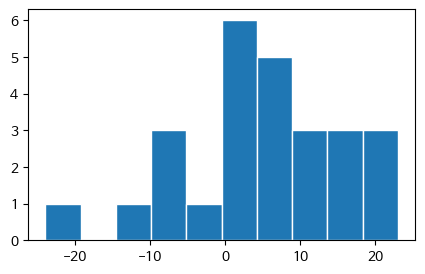

In [21]:
#히스토그램 그래프로 그린기
import matplotlib.pyplot as plt
plt.hist(x, edgecolor='w')
plt.show()

### [실습문제] 조선조 왕의 수명 데이터
 1. 왕들의　평균　수명
 2. 수명이　가장　짧은　왕,　나이
 3. 수명이　가장　긴　왕，　나이
 4. 왕들의　중앙값（나이）
 5. 왕들의　최빈값（나이）

In [ ]:
import numpy as np

# 키가 중복되면 안됨, 정조가 2개임 주의!!!
data = {'태조':73, '정종':62, '태종':45, '세종':53, '문종':38,
        '단종':16, '세조':51, '예종':28, '성종':37, '연산군':30,
        '중종':56, '인종':30, '명종':33, '선조':56, '광해군':66,
        '인조':54, '효종':40, '현종':33, '숙종':59, '경종': 36,
        '영조':82, '정조':48, '순조':44, '헌종':22, '철종':32,
        '고종':67, '순종':52}



def get_data_count(datas):
    '''데이터별 빈도'''
    values = sorted( list(set(datas)) )            # 고유값 리스트
    counts = [ datas.count(i) for i in values ]   # 빈도수 리스트
#     print(f'#데이터별 빈도: {list(zip(values, counts))}')
    return values, counts


def get_mode_value(datas):
    '''최다 빈도'''
    values, counts = get_data_count(datas)
    maxs = [(k, v) for k, v in zip(values, counts) if max(counts)== v]
    return maxs

name = list(data.keys())
age = list(data.age)

names= list(data.keys())
ages = list(data.values())

x_ = np.mean(ages)               # 평균값
me = np.median(ages)             # 중앙값
mo = get_mode_value(ages)        # 최빈값

print(f'#조선의 왕: {names}')
print(f'#왕들의 나이: {ages}')

# values, counts = get_data_count(ages)
# print(f'#데이터별 빈도: {list(zip(values, counts))}')

# print()
# print(f'#1.왕들의 평균나이   : {round(x_)}세')

# idx = ages.index( min(ages) ) # 값이 여러 개가 아니라는 가정
# print(f'2.수명이 가장 짧은 왕: {names[idx]}, {ages[idx]}세')

# idx = ages.index( max(ages) )
# print(f'3.수명이 가장 긴 왕  : {names[idx]}, {ages[idx]}세')

# print(f'4.왕들의 중앙값(나이): {round(me)}세')

# print(f"5.왕들의 최빈값(나이): {[f'{k}세 ' for k, v in mo ] } ")

In [23]:
import pandas as pd

data = {'이름': ['태조', '정종', '태종', '세종', '문종', '단종', '세조', '예종', '성종', '연산군', '중종', '인종', '명종', '선조', '광해군', '인조', '효종', '현종', '숙종', '경종', '영조', '정조', '순조', '헌종', '철종', '고종', '순종'],
        '수명': [73, 62, 45, 53, 38, 16, 51, 28, 37, 30, 56, 30, 33, 56, 66, 54, 40, 33, 59, 36, 82, 48, 44, 22, 32, 67, 52]}

df = pd.DataFrame(data)
df

,이름,수명
0,태조,73
1,정종,62
2,태종,45
3,세종,53
4,문종,38
5,단종,16
6,세조,51
7,예종,28
8,성종,37
9,연산군,30


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['수명'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['수명'], **{})
chart

### [실습문제] 산술평균, 중앙값, 최빈값 사이의 관계 설명
벤처기업에 근무하는 직원  30명의 연령 자료에 대한 산술평균, 중앙값, 최빈값 사이의 관계 설명하기

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 그래프 기본 설정
plt.rcParams['figure.figsize'] = (5, 3)        # (가로,세로) 인치 단위
plt.rcParams['axes.unicode_minus'] = False    # 그래프 눈금 값에서 (-)숫자표시
plt.rcParams['lines.linewidth'] = 2            # 선 굵기
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 사용  (AppleGothic)


def makeFrequencyTable(datas, k=5):
    # 도수분포표 만들기 사전 과정
    # k = 5                               # 1.계급 수
    R = round(max(datas) - min(datas), 6) # 2.R : 최대측정값 - 최소측정값
    w = math.ceil(R/k)                    # 3.계급 간격
    s = min(datas) - 0.5                  # 4.시작 계급값
    bins = np.arange(s, max(datas)+w+1, step=w)  #계급
    index = [f'{bins[i]} ~ {bins[i+1]}' for i in range(len(bins)) if i<(len(bins)-1) ] # 계급 구간(index)
    hist, bins = np.histogram(datas, bins)  # 계급 구간별 도수 데이터
    print(f'계급수(K):{k}, R:{R}, 계급간격(w):{w}, 계급시작값(s):{s}')
    print(f'계급:{bins}')


    # 도수분포표 만들기
    df = pd.DataFrame(hist, index=index, columns=['도수'])
    df.index.name = '계급간격'

    df['상대도수'] = [x/sum(hist) for x in hist]
    df['누적도수'] = [sum(hist[:i+1]) if i>0 else hist[i] for i in range(k)]
    df['누적상대도수'] = [sum(hist[:i+1]) if i>0 else df['상대도수'].values[i] for i in range(k)]
    df['계급값'] = [ (bins[x]+bins[x+1])/2 for x in range(k)]

    return df


datas = [31, 27, 25, 24, 21, 44, 36, 29, 35, 28,
         16, 26, 21, 37, 26, 22, 30, 29, 40, 33,
         35, 26, 22, 42, 25, 28, 39, 30, 27, 30]

# 도수분포표 만들기
df =  makeFrequencyTable(datas, k=6)
df

In [ ]:
def make_histogram(datas, x, y, width=10):
    fig = plt.bar(x,y, width=width, edgecolor='w') # 막대그래프
    plt.xticks(ticks=x, labels=x)

    x_ = np.mean(datas)      # 평균값
    me = round(np.median(datas))    # 중앙값
    from collections import Counter
    counts = Counter(datas)
    mo = counts.most_common(1)[0][0]  # 최빈값

    plt.axvline(x_, 0, max(y),
                c='red', label=f'mean({x_})')     # # 평균값 표시
    plt.annotate('평균', xy=(x_, 10), xytext=(50,10),
                 fontsize=12,
                 arrowprops=dict(facecolor='black', width=1, shrink=0.1, headwidth=5))

    plt.axvline(me, 0, max(y),
                c='green', label=f'median({me})') # 중앙값 표시

    plt.axvline(mo, 0, max(y),
                c='violet', label=f'mode({mo})')  # 최빈값 표시

    plt.title('(도수)히스토그램')
    plt.xlabel('계급값')
    plt.ylabel('도수')

    plt.legend()
    plt.show()


# 히스토그램 만들기
x = df['계급값']
y = df['도수']
make_histogram(datas, x, y)

In [ ]:
# seaborn 라이브러리로 히스토그램 그리기
import seaborn as sns
sns.histplot(datas, kde=True, bins=5)

-------

## 산포도
중심으로부터 데이터가 흩어져 있는 정도(변이도)를 수치적으로 측정

In [ ]:
import numpy as np

x = np.array([18,5,10,23,19,-8,10,0,0,5,2,15,8,2,5,4,15,-1,4,-7,-24,7,9,-6,23,-13])
print(x)

### - 분산(variance)
평균을 중심으로 밀집되거나 퍼짐 정도를 나타내는 척도

In [ ]:
print( np.var(x) )  # 분산

### - 표준 편차(standard deviation)

In [ ]:
print( np.std(x) )

 ### - 사분위수(quartile)
 - 백분위수(percentile): 수집한 자료를 크기순으로 나열할 때, 1%씩 등간격으로 구분하는 척도
 - 사분위수(quartiles): 수집한 자룔를 크기순으로 나열하여 4등분하는 척도, Q1, Q2, Q3 <br>
 - 자동 정렬 후 계산

In [ ]:
print( np.percentile(x, 0) ) # 0% 해당하는 수
print( np.percentile(x, 25) )  # 25%,  1사분위 수
print( np.percentile(x, 50) )  # 50%, 2사분위 수
print( np.percentile(x, 75) ) # 75%, 3사분위 수
print( np.percentile(x, 100) )  # 100%,  최대값

### - 변동계수(coefficient of variation)
 - 측정단위가 동일한 두 자료집단: 평균이 큰 차이를 보이는 두 자료집단
 - 측정단위가 서로 다른 두 자료집단: 산포의 척도를 비교할 때 많이 사용한다.

In [ ]:
def get_cov(S, ddof=0):
    M   = np.mean(S)            # 평균
    STD = np.std(S, ddof=ddof)  # 표준편차
    cov =  STD / M * 100        #변동계수
    print('mean: %.2f'%M, 'std: %.2f'%STD) #소수점 2자리로 표현

    return ( np.std(S, ddof=ddof) / np.mean(S) )* 100  #변동계수

A = [171, 164, 167, 156, 159, 164]
B = [11.5, 12.2, 12.0, 12.4, 13.6, 10.5]

print(f'#A 변동계수: ', round(get_cov(A, ddof=1), 2))
print(f'#B 변동계수: ', round(get_cov(B, ddof=1), 2) )

### - 왜도(skewness)
- 분포의 대칭이나 비대칭의 정도를 표시하는 척도
- 정규분포로부터 얼마나 멀어져있는지를 보는 수치(왜도=0, 완전한 정규분포)
- $\alpha = 0$ :   완전한 정규분포
- $\alpha > 0$ :   왼쪽으로 치우친 분포
- $\alpha < 0$ :   오른쪽으로 치우친 분포

### - 첨도(kurtosis)
- 뽀족함의 정도를 나타내는 척도
- 정규뷴포상에서 평균을 중심으로 집중화된 정도를 나타냄
- $\beta = 3$ :   뽀족한 정도가 정규분포와 같다
- $\beta > 3$ :   표준정규분포보다 정점이 높고 뽀족하다, 꼬리가 더 두꺼워짐
- $\beta < 3$ :   표준정규분포보다 정점이 낮고 완만하다, 꼬리가 더 얇아짐

In [24]:
# 왜도 & 첨도 구하기:  수학적 방법
import numpy as np

def skew_kurtosis(data):
    mean = np.mean(data)
    var = np.var(data)
    std = np.sqrt(var)

    # skewness
    skew = np.sum((data - mean)**3) / (len(data) * std**3)
    # kurtosis
    kurt = np.sum((data - mean)**4) / (len(data) * std**4) - 3

    return skew, kurt

datas = [31, 27, 25, 24, 21, 44, 36, 29, 35, 28,
         16, 26, 21, 37, 26, 22, 30, 29, 40, 33,
         35, 26, 22, 42, 25, 28, 39, 30, 27, 30]

skew, kurt = skew_kurtosis(datas)
print("Skewness: ", skew)
print("Kurtosis: ", kurt)

Skewness:  0.3687197545758706
Kurtosis:  -0.3854868247756933


### [실습문제] 산포도 구하기
다음은 어느 정유회사에서 생산하는 자동차용 휘발유의 옥탄가 자료이다. 평균, 분산, 표준편차, 왜도, 첨도, 분포 형태 설명

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

datas=[ 90.7, 90.0, 92.2, 91.0, 88.5, 87.8, 83.4, 82.1, 88.6, 100.2,
        95.6, 93.3, 88.2, 91.0, 92.7, 93.2, 91.0, 93.4, 85.3, 88.6,
        96.1, 98.9, 89.9, 89.8, 91.1, 89.7, 88.2, 93.7, 84.3, 97.9,
        87.9, 90.1, 88.3, 93.3, 95.4, 91.6, 88.9, 92.6, 97.4, 87.4,
        86.7, 90.4, 91.1, 92.6, 88.8, 89.3, 89.8, 89.2, 88.6, 89.0,
        96.1, 95.6, 92.2 ]

x_ = np.mean(datas)
var= np.var(datas)
std= np.sqrt(var)
std = np.std(datas)
skew, kurt = skew_kurtosis(datas)
print("1. mean              : ", round(x_, 5) )
print("2. variance          : ", round(var, 5) )
print("3. standard deviation: ", round(std, 5) )
print("4. Skewness          : ", round(skew, 5) )
print("5. Kurtosis          : ", round(kurt, 5) )


1. mean              :  90.91887
2. variance          :  13.74115
3. standard deviation:  3.70691
4. Skewness          :  0.25306
5. Kurtosis          :  0.17784


In [27]:
# 도수분포표 만들기
df =  makeFrequencyTable(datas, k=5)
x, y = df['계급값'], df['도수']
make_histogram(datas, x, y, width=5)

NameError: ignored

<Axes: ylabel='Count'>

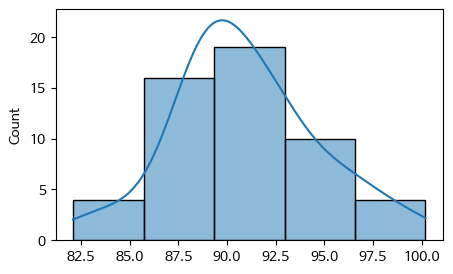

In [28]:
# seaborn 라이브러리로 히스토그램 그리기
import seaborn as sns
sns.histplot(datas, kde=True, bins=5)

### [실습문제] 변동계수 비교하기
- data1 : 1부터 10 사이의 정수 100개 무작위 추출
- data2 : 평균 1 이고, 표준편차가 1인 정규분포를 이루는 100개 무작위 추출

In [29]:
import numpy as np

# 데이터 집단 만들기
data1 = np.random.randint(1, 11, size=100)  # 1부터 10 사이의 정수 100개 무작위 추출
data2 = np.random.normal(loc=1, scale=1, size=100)  # 평균 1, 표준편차 1인 정규분포에서 100개 무작위 추출

print('#data1 변동계수: ', get_cov(data1, ddof=0), '%')
print('#data2 변동계수: ', get_cov(data2, ddof=0), '%')

NameError: ignored

In [ ]:
sns.histplot(data1, kde=True, bins=5)

In [ ]:
sns.histplot(data2, kde=True, bins=5)

### [실습문제] 사분위수를 이용하여 위치 확인하기
- 사분위수를 구하시오
- 상자그림을 그리시오.

In [30]:
import numpy as np

datas = [26, 31, 27, 38, 42, 26, 18, 17, 25, 29,
         39, 38, 38, 40, 46, 38, 39, 41, 41, 40,
         26, 19, 39, 28, 45, 34, 21, 41, 30, 30,
         12, 22, 48, 34, 29, 26, 29, 58, 43, 16,
         42, 44, 38, 44, 28, 43, 39, 42, 39, 46]

print(sorted(datas))

Q1 = np.percentile(datas, 25).astype('int') # 1사분위
Q2 = np.percentile(datas, 50).astype('int')  # 2사분위
Q3 = np.percentile(datas, 75).astype('int')  # 3사분위
Q4 = np.percentile(datas, 100).astype('int') # 4사분위

print('1사분위(Q1: 25%):', Q1 )
print('2사분위(Q2: 50%):', Q2 )
print('3사분위(Q3: 75%):', Q3 )
print('4사분위(Q4:100%):', Q4 )

[12, 16, 17, 18, 19, 21, 22, 25, 26, 26, 26, 26, 27, 28, 28, 29, 29, 29, 30, 30, 31, 34, 34, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 40, 40, 41, 41, 41, 42, 42, 42, 43, 43, 44, 44, 45, 46, 46, 48, 58]
1사분위(Q1: 25%): 27
2사분위(Q2: 50%): 38
3사분위(Q3: 75%): 41
4사분위(Q4:100%): 58


### 상자그림
 - Box Plot: 사분위수를 이용하여 수집한 자료에 포함된 **특이값**을 알려주는 그림
 - 두 개 이상의 자료 집단을 비교할 때 매우 유용
 - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

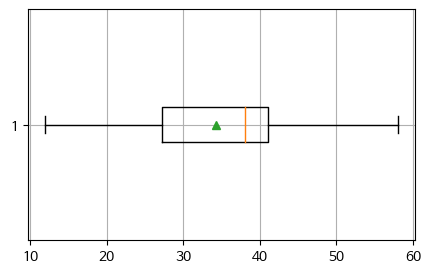

In [31]:
import matplotlib.pyplot as plt

# 가로로 그리기
plt.boxplot(datas, vert=False, showmeans=True)
plt.grid()
plt.show()

In [ ]:
plt.boxplot(datas, showmeans=True)
plt.grid()
plt.show()

### [실습문제] 위치척도와 상자그림

data1: [56, 90, 88, 87, 68, 32, 76, 54, 100, 41]
data2: [8, 51, 70, 86, 2, 77, 81, 75, 64, 89]
data3: [15, 55, 64, 95, 67, 67, 51, 58, 57, 89]

ext_outlier      : []
mid_outlier      : []
ext_outlier      : []
mid_outlier      : [8, 2]
ext_outlier      : [15]
mid_outlier      : [95, 89]


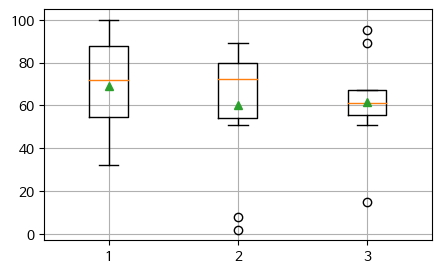

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def get_outlier_data(datas):
    Q1 = np.percentile(datas, 25).astype('int') # 1사분위 (편의상 정수로 만듦)
    Q3 = np.percentile(datas, 75).astype('int')  # 3사분위
    IQR = Q3 - Q1
    fl = Q1 - 1.5*IQR  # lower inner fence
    fu = Q3 + 1.5*IQR  # upper inner fence
    fL = Q1 - 3*IQR    # lower outer fence
    fU = Q3 + 3*IQR    # upper outer fence
    mid_outlier = [x for x in datas if (fL<=x<=fl) or (fu<=x<=fU)] # mid ouetlier(보통 특이값)
    ext_outlier = [x for x in datas if (fL>=x) or (fU<=x)]         # extreme outlier(특이값)
#     print(f"ordered data     : {sorted(datas)} ")
#     print(f'lower inner fence: {fl}')
#     print(f'upper inner fence: {fu}')
#     print(f'lower outer fence: {fL}')
    print(f'ext_outlier      : {ext_outlier}')
    print(f'mid_outlier      : {mid_outlier}')



data1 = [56,  90,  88,  87,  68,  32,  76,  54, 100,  41]  # 특이값 미 포함
data2 = [8, 51, 70, 86,  2, 77, 81, 75, 64, 89]    # (보통)특이값 포함
data3 = [15, 55, 64, 95, 67, 67, 51, 58, 57, 89]   # (보통)특이값 + 특이값 포함
print(f'data1: {data1}')
print(f'data2: {data2}')
print(f'data3: {data3}')
print()

# outlier 값 찾기
get_outlier_data(data1)
get_outlier_data(data2)
get_outlier_data(data3)

# 상자그림 그리기
plt.boxplot([data1, data2, data3], showmeans=True)
plt.grid()
plt.show()

---------------

### [실습문제] 산점도와 상관계수
학생 건강검사 자료(2019년도 학생 건강검사 표본통계, 교육부) 중 서울지역 초등학교 3학년 남학생에 대한 표본에 대해 키와 몸무게를 이용하여 산점도를 나타내고 상관계수를 계산하시오.

In [36]:
# 1. 데이터 확인
import pandas as pd

df = pd.read_excel('./sample_data/초등학교3학년_남자.xlsx')
df
# 기술통계 나타내기
df.describe()

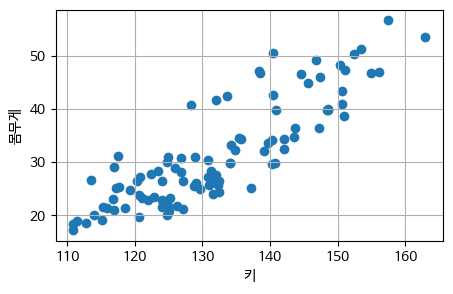

,키,몸무게
키,1.000000,0.858301
몸무게,0.858301,1.000000


In [39]:
# 2. 산점도로 확인
import matplotlib.pyplot as plt

plt.scatter(df.키, df.몸무게)
plt.xlabel('키')
plt.ylabel('몸무게')
plt.grid()
plt.show()

#상관계수
df.corr()

In [38]:
# 표본 상관계수(print(df.corr(method='pearson')) 확인
import scipy as sp

corr = sp.stats.pearsonr(df.키, df.몸무게) # 피어슨 상관계수
print(f'scipy stats 피어슨상관계수: {corr}')
print()
# pandas print(df.corr(method='pearson'))
print(f'pandas 피어슨상관계수: {df.corr(method="pearson")}')

scipy stats 피어슨상관계수: PearsonRResult(statistic=0.8583011404409244, pvalue=1.4375440398437296e-29)

pandas 피어슨상관계수:             키       몸무게
키    1.000000  0.858301
몸무게  0.858301  1.000000


----

### 회귀분석(regression analysis)**
- 변수가 **다른 변수에 영향을 미치는 관계를 식별**하기 위한 통계적 방법
- 두 변수 간의 관계를 파악하여 **한 변수의 값으로부터 그에 대응하는 다른 변수의 값을 예측**하고자 할 때 사용하는 통계적 방법
<br><br>
- **독립변수(independent variable)** : 다른 변수에 영향을 주는 변수, 설명변수(explanatory variable)
- **종속변수(dependent variable)** : 영향을 받는 변수, 반응변수(response variable)

### 단순선형회귀모형(simple linear regression model) : 직선회귀모형

 - $y_i = a + bx_i + e_i$   $(e_i ~ N(0,\sigma^2), i=1,2,...,n)$ <br><br>
 - $a, b$ : 모회귀계수
 - $x_i$  : 독립변수(설명변수), $y_i$:종속변수(반응변수)
 - $e_i$  : $N(0,\sigma^2)$을 따르는 확률변수(오차항) <br><br>
 -- **==> 모회귀계수 $a, b$를 추정함으로서 회귀직선을 추정할 수 있다!**

### [실습문제] 단순 회귀분석

In [44]:
# 1. 데이터 확인
import pandas as pd

cm = 2.54  # 키데이터를  inch --> cm로 변환하기 위해
df = pd.read_excel('./sample_data/Galtons Height Data_딸.xlsx')
print(df.columns)



df['father'] = df['father'] * cm
df['daughter'] = df['daughter'] * cm
# df['father'] = df.father * cm
# df['daughter'] = df.daughter * cm


df

Index(['father', 'daughter'], dtype='object')


,father,daughter
0,199.39,175.768
1,199.39,175.260
2,199.39,175.260
3,191.77,166.370
4,191.77,166.370
...,...,...
428,157.48,154.940
429,158.75,144.780
430,173.99,162.560
431,173.99,161.290


아버지:<class 'pandas.core.series.Series'>, 0      199.39
1      199.39
2      199.39
3      191.77
4      191.77
        ...  
428    157.48
429    158.75
430    173.99
431    173.99
432    173.99
Name: father, Length: 433, dtype: float64


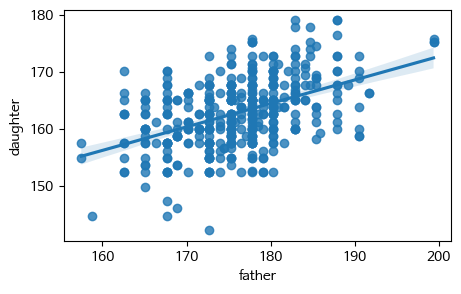

In [46]:
# 2. 산점도(추정된 회귀직선 표시) 확인
# 방법: seaborn 사용하기
import matplotlib.pyplot as plt
import seaborn as sns

#print(f'아버지:{type(df.father)}, {df.father}')
#sns.regplot: seaborn 라이브러리에 있는 회귀분석 그래프
sns.regplot(x=df.father, y=df.daughter)
plt.xlabel('father')
plt.ylabel('daughter')
plt.show()

In [47]:
# 3. 결정계수 구하기
# 방법: statsmodels 사용하기
from statsmodels.formula.api import ols

model = ols('df.daughter ~ df.father', data=df).fit() #ols('종속변수명 ~ 독립변수명', data=데이터프레임객체)

print(f'결정계수: {model.rsquared: .4f}')

model.summary() # 모델 요약

결정계수:  0.2105


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            df.daughter   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     114.9
Date:                Fri, 25 Aug 2023   Prob (F-statistic):           6.36e-24
Time:                        03:19:48   Log-Likelihood:                -1340.1
No. Observations:                 433   AIC:                             2684.
Df Residuals:                     431   BIC:                             2692.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     90.3865      6.764     13.362      0.000      77.091     103.682
df.father      0.4116      0.038     10.719      0.000       0.336       0.487
==============================================================================
Omnibus:                        0.354   Durbin-Watson:                   1.440
Prob(Omnibus):                  0.838   Jarque-Bera (JB):                0.410
Skew:                          -0.067   Prob(JB):                        0.815
Kurtosis:                       2.931   Cond. No.                     4.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

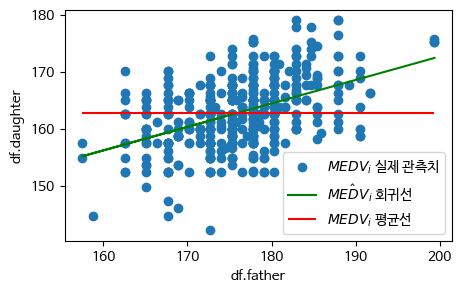

In [48]:
# 추정된 회귀직선 표시
# 방법1: 직접 그리기
target_pred = model.predict()

plt.scatter(df.father, df.daughter, marker='o', label='$MEDV_i$ 실제 관측치')
plt.plot(df.father, target_pred, color = 'g', label='$\hat{MEDV}_i$ 회귀선')
plt.hlines(df.daughter.mean(), df.father.min(), df.father.max(), color = 'r', label='$MEDV_i$ 평균선')
plt.legend()
plt.xlabel('df.father')
plt.ylabel('df.daughter')
plt.show()

In [ ]:
# 추정된 회귀직선 표시
# 방법2: seaborn regplot()함수 사용
sns.regplot(x=df.father, y=df.daughter)
plt.xlabel('아빠')
plt.ylabel('딸')
plt.title('추정회귀직선')
plt.show()

-------------------

## 사이킷런을 이용한 선형회귀 모델

### 사이킷런(Scikit-learn)
- **대표적인 머신러닝 라이브러리** : https://scikit-learn.org/
- 2007년 구글 하계 코드 프로젝트 모임에 참여한 개발자들 중심으로 시작된 오픈 소스 개발 방식 라이브러리
- 딥러닝 프레임워크는 제공 안함

#### 머신러닝을 위해서는 필요한 것 5가지
- 1.데이터준비(데이터셋): 특성과 테이블(optional)로 이루어진 데이터
- 2.모델선정: 데이터를 바탕으로 동자기 결정되는 모델
- 3.하이퍼파라미터: 모델 설정 위해 학습에 사용되는 파라미터 (ex: learning rate, 훈련반복횟수, 가중치 초기화 값 등)
- 4.학습:  학습을 위한 훈련단계
- 5.검증: 검증의 여러 단계

#### 선형 회귀분석 모델의 예측력 향상에 좋은 **4가지 기본 가정**
- 1.**선형성**:   독립변수와 종속변수 간의 분포 관계가 **선형의 관계**를 가진다.
- 2.**독립성**:   독립성은 다중 회귀분석의 중요한 기본 가정으로 독립변수와 다른 독립변수 간의 **상관관계가 적을 경우** 선형 회귀 모델의 예측력이 좋아진다.
- 3.**등분산성**: 분산이란 데이터의 분포 정도에 대한 척도인데, 데이터가 특정한 패턴 없이 **고르게 분포**하는 것이, 특정한 좁은 구간에만 집중해서 분포하는 것보다 더 나은 예측을 보인다.
- 4.**정규성**:   잔차(residual)란 회귀직선과 관측값과의 차이인데, 오차(error)라고도 한다. 이 **차이(오차)가 정규성을 만족**해야 한다.

### [실습문제] 사이킷런으로 선형회귀직선(추정회귀직선) 구하기
간단 데이터를 이용하여 선형회귀직선 구하기

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model

# 1. 데이터 준비
data = {'X':[1, 1, 2, 3, 4, 4, 5, 6, 6, 8],
        'Y':[2, 3, 4, 5, 7, 8, 10, 11, 12, 15]}
df = pd.DataFrame(data) #판다스의 DataFrame으로 만들어줌, 가로세로의 2차원데이터

# 2. 학습모델 선정
model = linear_model.LinearRegression()  # 선형회귀모델

# 3. 하이퍼파라미터

# 4. 학습
X = [[i] for i in df.X]  # 사이킷런에서 독립변수(X)값은 2차원 형태로 만들어줘야한다.
Y = df.Y
model.fit(X, Y)  #머신러닝이 학습을 시작하는 것

# 5. 검증
# y = ax + b
coef = model.coef_               # 직선의 기울기(a)
intercept = model.intercept_     # 직선의 절편(b)
score = model.score(X, Y)        # 추정된 회귀직선의 정확도(결정계수 r2)
print(f"선형회귀직선: y = {coef[0]:.2f}x + {intercept: .2f}")
print(f"선형회귀직선의 관계점수(R2): {score: .2f}")

선형회귀직선: y = 1.83x +  0.37
선형회귀직선의 관계점수(R2):  0.98


### [실습문제] 키로 몸무게 추정하는 선형회귀 모델
- 167cm 남학생의 몸무게는?
- 167cm 여학생의 몸무게는?

In [50]:
import pandas as pd
import numpy as np
from sklearn import linear_model

# 1. 데이터 준비
df = pd.read_excel('./sample_data/키와몸무게.xlsx')
df

# 2. 학습모델 선정
model = linear_model.LinearRegression()  # 선형회귀모델

# 3. 하이퍼파라미터

# 4. 학습
X = df[['키','구분']]  # 구분: 남자 0, 여자 1
Y = df.몸무게
model.fit(X.values, Y)  # X 대신 X.values (warnings.warn 메시지 안나오게 하려면)

# 5. 검증
# y = ax + b
coef = model.coef_               # 직선의 기울기(a)
intercept = model.intercept_     # 직선의 절편(b)
score = model.score(X, Y)        # 추정된 회귀직선의 정확도(결정계수 r2)
print(f"선형회귀직선: y = {coef[0]:.2f}x + {intercept: .2f}")
print(f"선형회귀직선의 관계점수(R2): {score: .2f}")
print(f"167cm 남학생 추정 몸무게: {model.predict([[167,0]])}")
print(f"167cm 여학생 추정 몸무게: {model.predict([[167,1]])}")
print(f"167cm 남학생, 여학생의 추정 몸무게: {model.predict([[167,0], [167,1]])}")

선형회귀직선: y = 0.75x + -61.23
선형회귀직선의 관계점수(R2):  0.84
167cm 남학생 추정 몸무게: [63.69388959]
167cm 여학생 추정 몸무게: [56.46358918]
167cm 남학생, 여학생의 추정 몸무게: [63.69388959 56.46358918]


--------------------

### [실습문제] 사이킷런으로 상관분석하기 :  국가별 기대수명
- Data : https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who
- WHO 데이터 : 2000 ~ 2015년 나라별 기대수명과 보건 예산, 질병 통계, 비만도 등

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

# 1. 데이터 준비
df = pd.read_csv('./sample_data/life_expectancy.csv')
df.head()   #앞에서 차례로 N개 데이터 보여주기 기본 5개

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


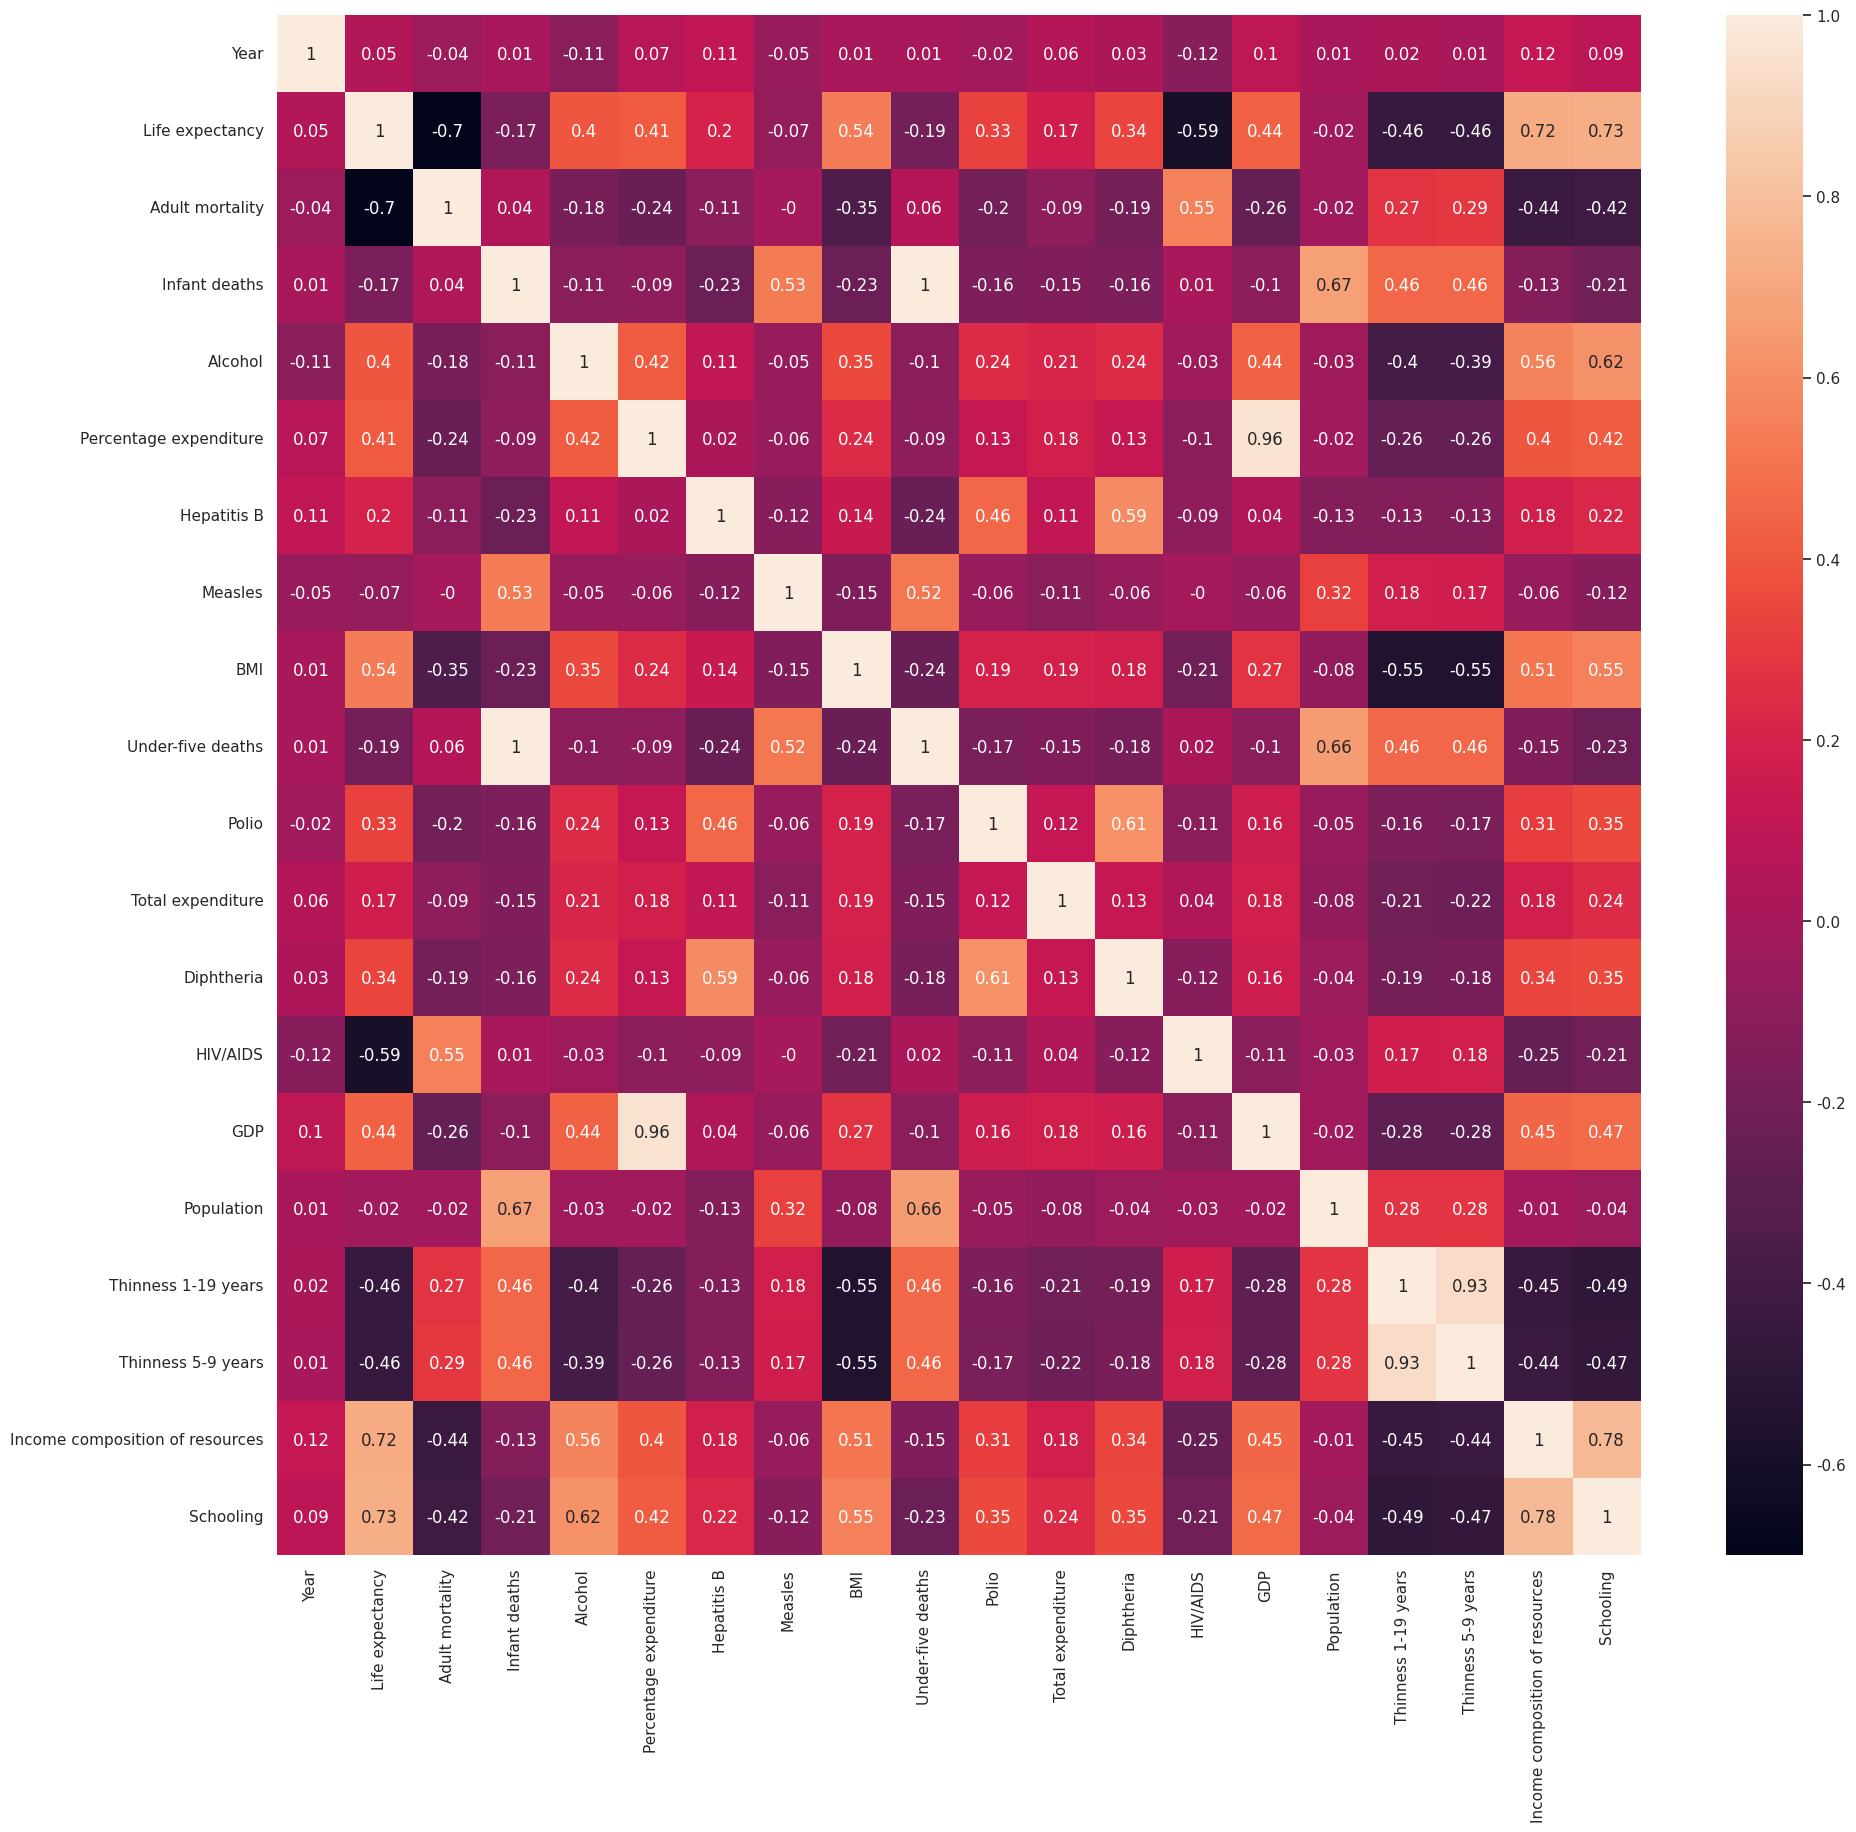

In [55]:
# 컬럼간 상관관계 확인
df.dropna(inplace=True)   # 결측치 제거

correlation_matrix = df.corr().round(2)
#print(correlation_matrix)
sns.set(rc={'figure.figsize':(22, 20)})
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

기대수명과 상관계수 높은 변수


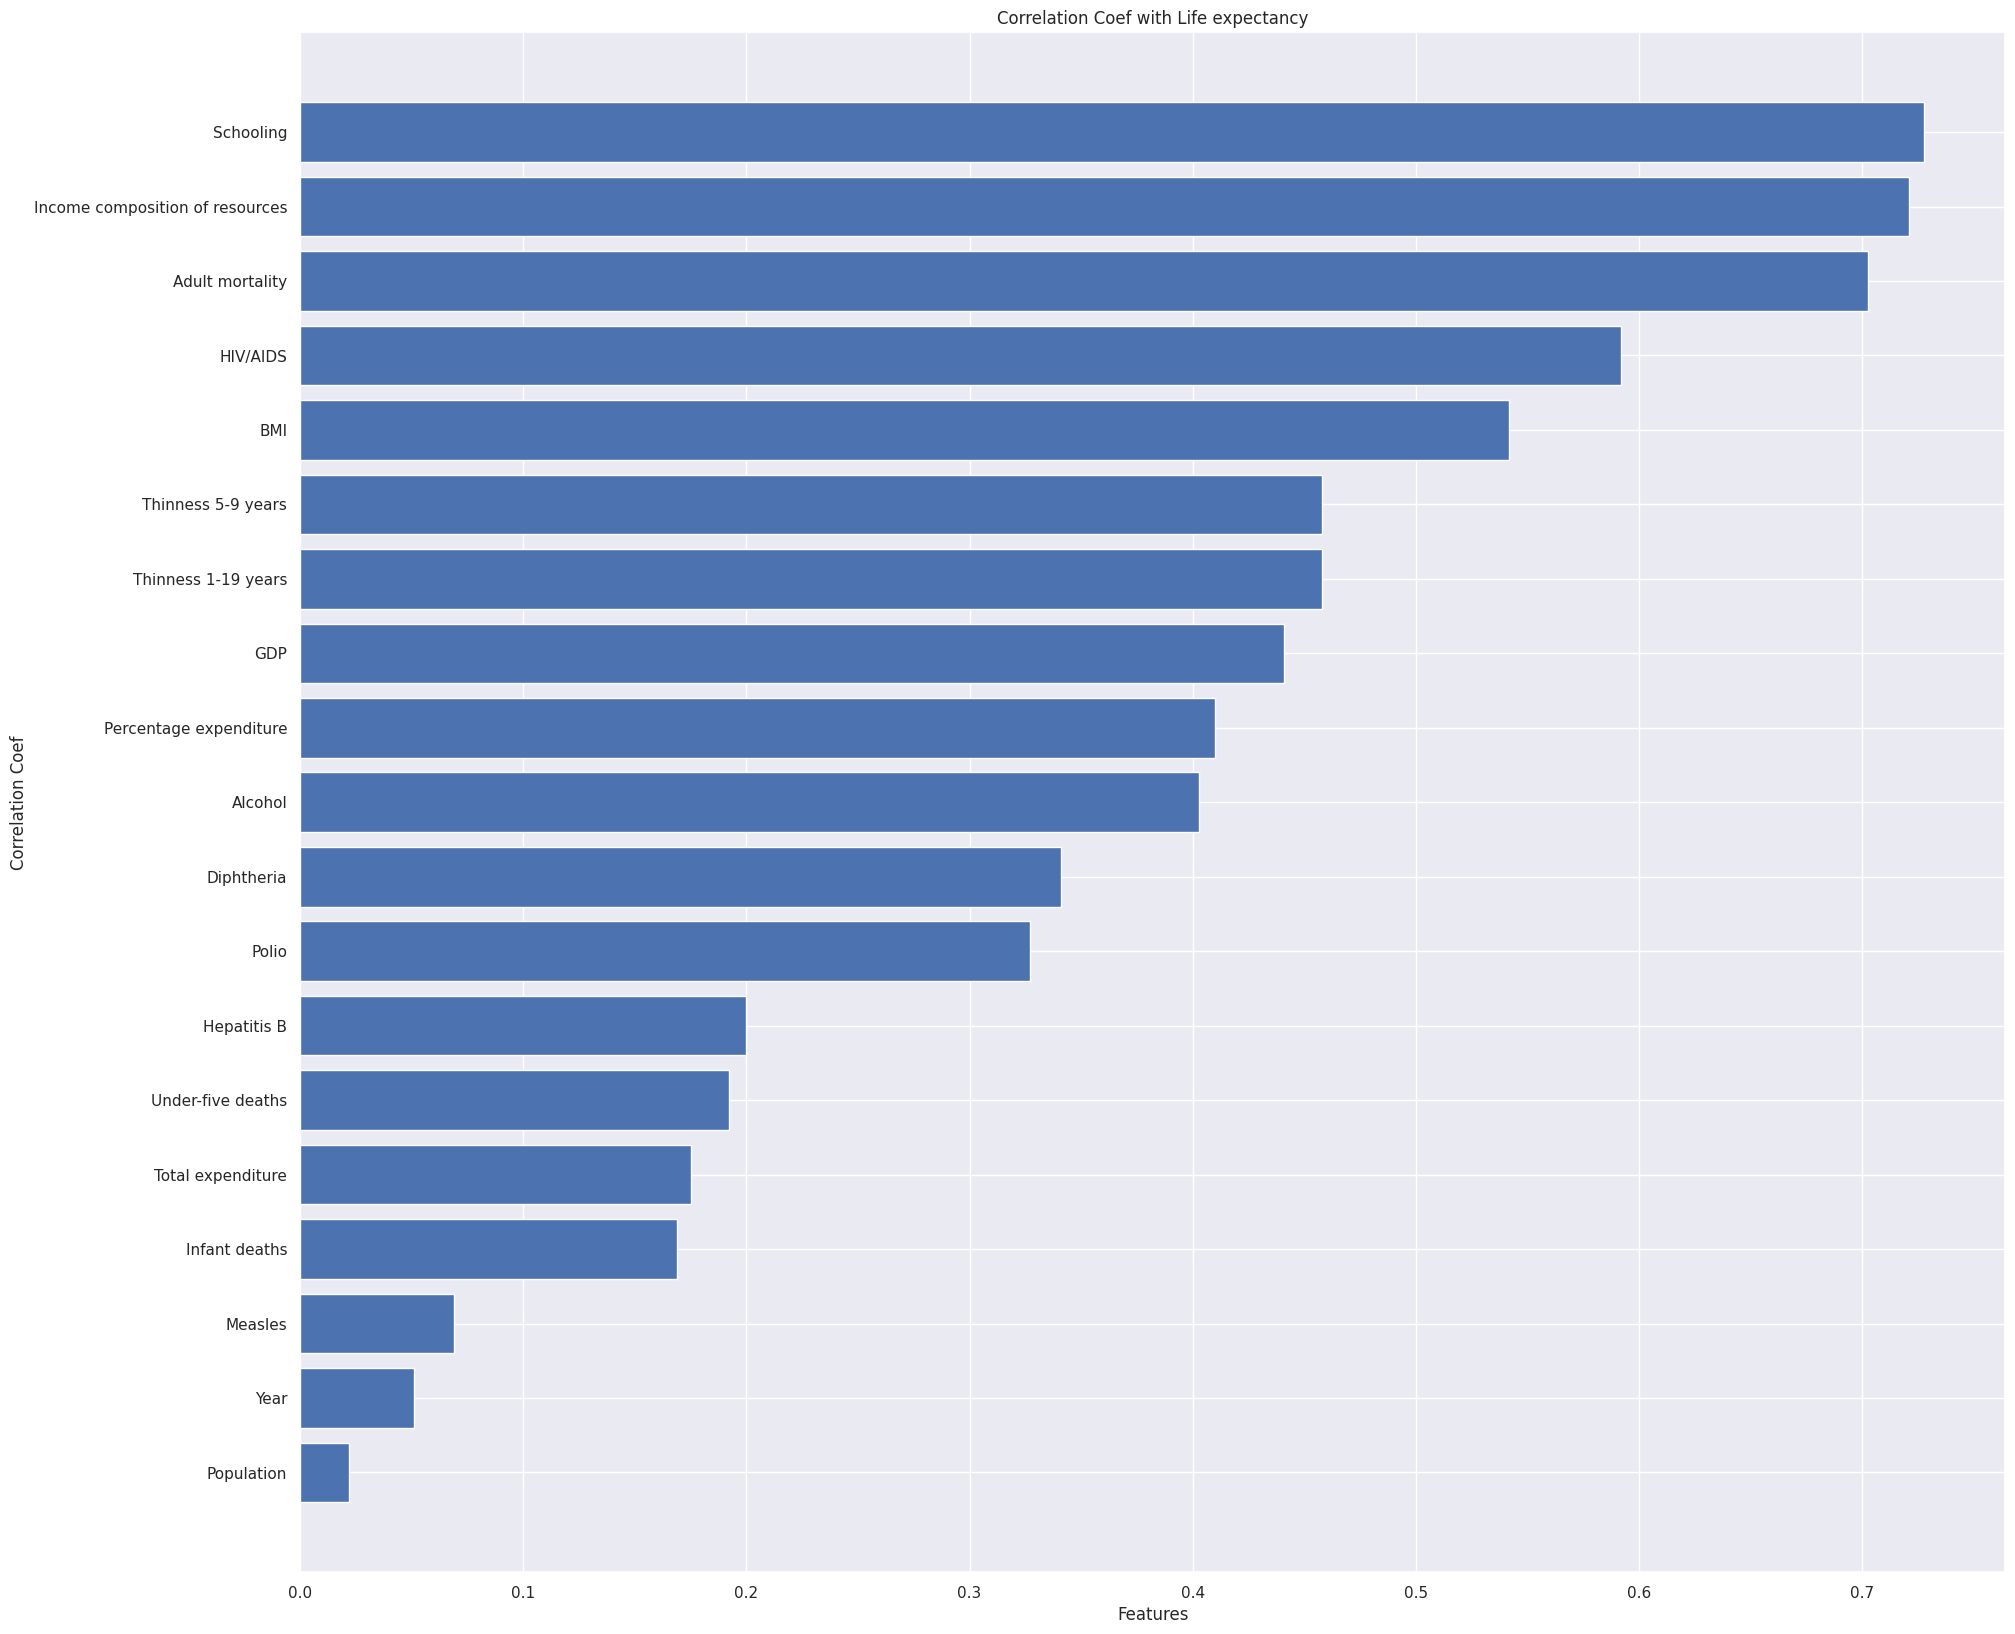

In [56]:
# 기대수명과 피어슨 상관계수 높은 컬럼 선택
print('기대수명과 상관계수 높은 변수')
c = df.corr().round(3)['Life expectancy']
c = np.abs( c ) # 상관계수 절대값

c.sort_values(ascending=True, inplace=True)  # 오름차순 정렬
c = c[:-1]   # 자기 자신을 제외

# 시각화
plt.barh(c.index, c.values)
plt.title('Correlation Coef with Life expectancy')
plt.xlabel('Features')
plt.ylabel('Correlation Coef')
plt.show()

기대수명과 상관관계 높은 컬럼 : ['Schooling', 'Income composition of resources', 'Adult mortality', 'HIV/AIDS', 'BMI']


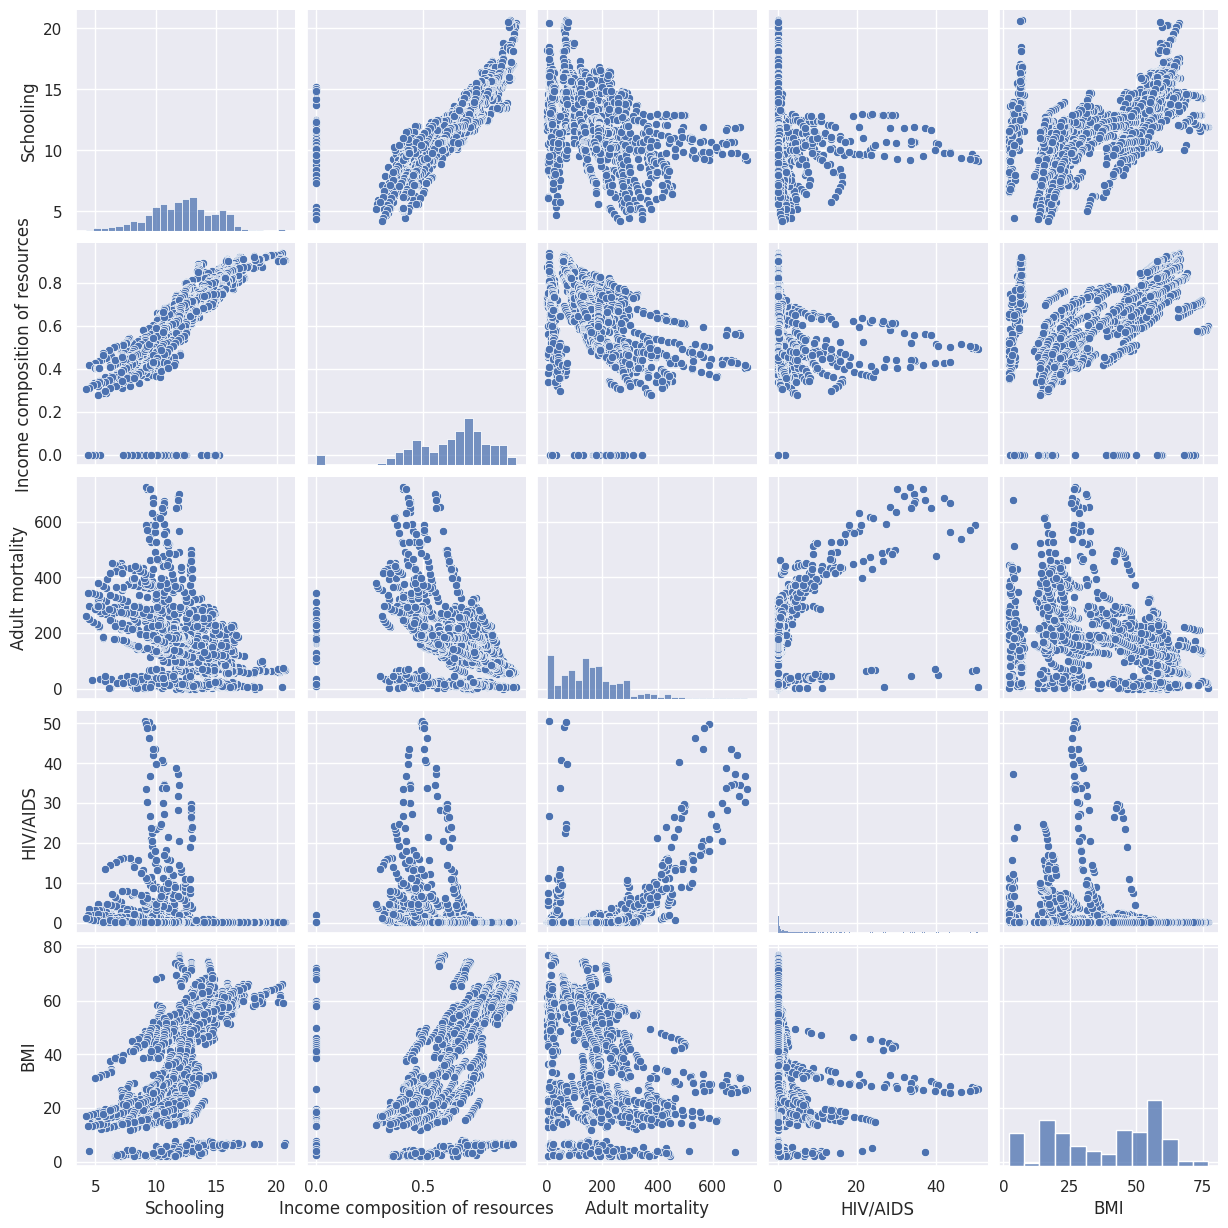

In [57]:
# 기대수명과 피어슨 상관계수 높은 컬럼 선택
# 조건 검색
c = c[c.values > 0.5]     # 상관계수 0.5 이상인 값 추출
c.sort_values(ascending=False, inplace=True)  # 내림차순 정렬
print(f'기대수명과 상관관계 높은 컬럼 : {c.index.to_list()}' )            # 컬럼명

# 시각화
sns.pairplot(df[c.index.to_list()])
plt.show()

In [ ]:
# 선형회귀모델 점수 확인
X = df[c.index.to_list()]
Y = df['Life expectancy']

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)
print(f'선형회귀모델 점수 = {model.score(X_test, y_test): .3f}')


선형회귀모델 점수 =  0.783


---------------------------

THE END